# Project: We Rate Dogs Tweets Data Wrangling

## Table of contents

<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#avd">Analyzing and Visualizing Data</a></li>
<li><a href="#ref">References</a></li>

<a id='intro'></a>
## Introduction

> This project is based on the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

> The dataset comes from three sources:

>1. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email. This archive contains basic tweet data (text, extract rating, dog name and dog stage.) for all 5000+ of their tweets as they stood on August 1, 2017. This file was downloaded manually 
>2. A file containg the prediction of the dog breed based on their photos . This file contains tweet ID, image URL, and the image number etc. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
>3. Gathering each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive and query the Twitter API for each tweet's JSON data using Python's Tweepy library.

<a id='gather'></a>
## Gathering Data

In [4]:
#Importing packages

import pandas as pd
import numpy as np
import requests
import tweepy as tw
import json

In [59]:
#Importing the first data source (Archive)
df1 = pd.read_csv(r'C:\Users\USER\Desktop\Udacity Data Wranging Project\twitter-archive-enhanced.csv')

In [60]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [27]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [64]:
#importing the second data source (image_prediction)
#This data is hosted on Udacity's servers and was downloaded programmatically
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
df2 = pd.read_csv('image_predictions.tsv',sep = '\t')

In [65]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
#Importing the third data source from twitter API using Tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

#dataframe with tweet _id in first 
tweet_ids = df1.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [54]:
df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
df3 = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [56]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6993,33781
1,892177421306343426,5293,29299
2,891815181378084864,3471,22032
3,891689557279858688,7216,36889
4,891327558926688256,7746,35276


<a id='assess'></a>
## Assessing Data

Assessing data is performed before cleaning to identify and categorize common data quality and tidiness issues. This is done visually and programatically. The three data sources will be assessed for their qualiy and tidiness. They will also be cleaned concurrently below.

In [67]:
df1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Quality issue will be represented as Q and Tidiness issue will be represented as T: 
Q1. In the Twitter archive dataset, Timestamp is an object instead of datetime format. This will be changed in the cleaning data section
Q2. There's a lot of missing data in the reweets and reply columns. They are not needed for analyses and will be dropped. The expanded URL column has 59 missing links.

In [69]:
df1.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1449,696100768806522880,NaN,NaN,2016-02-06 22:38:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,NaN,NaN,NaN,https://vine.co/v/i1KWj0vbvA9,10,10,None,None,None,pupper,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None
1387,700505138482569216,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,None,None,None,None
1648,683773439333797890,NaN,NaN,2016-01-03 22:14:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's gaining strength. Currentl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683773439...,9,10,Buddy,None,None,None,None


Q3: None will be replaced with NaN in the dataset
T1: doggo, floofer, pupper, and puppo are dog stages. They should be in a column named dog stage 

In [82]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
Q4: HTML tag is present in URL. We will need to remove it to detect the source of tweets

In [70]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In the twitter achive dataset, the numerator of not supposed to be less than 10 and the denominator is not supposed to be greater than 10. From the description above, that is not the case. I'll dive deeper into this issue.

In [71]:
df1.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

Q5: Outliers are present in the numerator

In [72]:
df1.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

Q6: Denominator is not equal to 10

In [248]:
df1.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [252]:
print(df1.name.value_counts())

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64


Q7: Wrong names such as "a", "the", "very", "acceptable" etc are present. They will be conerted to NaN in the cleaning stage

In [73]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [75]:
df2.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
605,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,EntleBucher,0.523206,True,Greater_Swiss_Mountain_dog,0.431657,True,Appenzeller,0.044208,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.417602e+17,2467.515491,7045.511618
std,6.824306e+16,4180.446228,10955.297388
min,6.660209e+17,1.000000,0.000000
25%,6.780228e+17,492.750000,1219.500000
50%,7.176639e+17,1147.500000,3045.500000
75%,7.986673e+17,2855.250000,8587.750000
max,8.924206e+17,70605.000000,144694.000000


In [80]:
df3.sample(7)

,tweet_id,retweet_count,favorite_count
1230,710153181850935296,814,2685
1188,714631576617938945,900,3020
1880,674394782723014656,488,1337
394,822975315408461824,3200,16352
316,832769181346996225,38,0
1550,687124485711986689,462,2022
1259,708130923141795840,785,3102


In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


Q8. In all three datasets, Tweet ID is an integer. There will be no arithmetics on this so it will be coverted to a string

T2. The datasets are all split. They will be merged  

<a id='clean'></a>
## Cleaning Data

In [405]:
#creating a copy for the datasets
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

In [ ]:
#We only want original ratings not retweets, therefore all retweets and replys will be dropped.

In [406]:
drop_retweets = df1_copy[pd.notnull(df1_copy['retweeted_status_id'])].index
drop_retweets

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [407]:
drop_reply = df1_copy[pd.notnull(df1_copy['in_reply_to_status_id'])].index
drop_reply

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [408]:
df1_copy.drop(index=drop_retweets, inplace=True)
df1_copy.drop(index=drop_reply, inplace=True)

In [479]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [ ]:
#We will also remove text that begins with RT

In [486]:
mask = df1_copy["text"].str.contains("RT")

In [487]:
df1_copy.drop(df1_copy[mask].index,inplace = True)

In [488]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2086 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2086 non-null   datetime64[ns, UTC]
 4   source                      2086 non-null   object             
 5   text                        2086 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2083 non-null   object             
 10  rating_numerator            2086 non-null   int64           

#### Define

#### Define :Q1. In the Twitter archive dataset, Timestamp is an object instead of datetime format.

#### Code

In [489]:
#Converting timestamp from object to datetime format
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

#### Test

In [490]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2086 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2086 non-null   datetime64[ns, UTC]
 4   source                      2086 non-null   object             
 5   text                        2086 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2083 non-null   object             
 10  rating_numerator            2086 non-null   int64           

#### Code

#### Define : Q2: Dropping columns reweets and replys columns

In [491]:
#Dropping columns reweets and replys columns

df1_copy_clean = df1_copy.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

#### Test

In [492]:
df1_copy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   int64              
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                2086 non-null   object             
 8   doggo               2086 non-null   object             
 9   floofer             2086 non-null   object             
 10  pupper              2086 non-null   object             
 11  puppo               2086 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define :Q3: None will be replaced with NaN in the dataset

#### Code

In [493]:
#None will be replaced with NaN in the dataset
df1_copy_clean.replace('None', np.nan, inplace=True)


#### Test

In [494]:
df1_copy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   int64              
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                1489 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              229 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define : T1: doggo, floofer, pupper, and puppo are dog stages. They should be in a column named dog stage

#### Code

In [495]:
#doggo, floofer, pupper, and puppo are dog stages and are in row formart. They should be in a column named stage_of_dog

In [496]:
df1_copy_clean['dog_stages'] = df1_copy_clean['doggo'].map(str) + df1_copy_clean['floofer'].map(str) + df1_copy_clean['puppo'].map(str) +  df1_copy_clean['pupper'].map(str)

In [497]:
df1_copy_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
1375,701889187134500865,2016-02-22 21:59:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,https://twitter.com/dog_rates/status/701889187...,11,10,Bilbo,NaN,NaN,NaN,NaN,nannannannan


In [498]:
df1_copy_clean['dog_stages'].value_counts()

nannannannan          1752
nannannanpupper        220
doggonannannan          71
nannanpupponan          23
nanfloofernannan         9
doggonannanpupper        9
doggonanpupponan         1
doggofloofernannan       1
Name: dog_stages, dtype: int64

In [499]:
df1_copy_clean['dog_stages'] = df1_copy_clean['dog_stages'].map(lambda x: x.replace("nan",""))

In [500]:
df1_copy_clean['dog_stages'].value_counts()

                1752
pupper           220
doggo             71
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [501]:
df1_copy_clean.loc[df1_copy_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
df1_copy_clean.loc[df1_copy_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
df1_copy_clean.loc[df1_copy_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [502]:
df1_copy_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [503]:
df1_copy_clean['dog_stages'].value_counts()

                  1752
pupper             220
doggo               71
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

#### Define : Q4: HTML tag is present in URL. We will need to remove it to detect the source of tweets

#### Code

In [504]:
#HTML tag is present in URL 

In [505]:
df1_copy_clean['source'] = df1_copy_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [506]:
df1_copy_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Test

In [507]:
df1_copy_clean['source'].value_counts()

Twitter for iPhone     1956
Vine - Make a Scene      88
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define: Q5: Outliers are present in the numerator

#### Code

Replacing outliers in the numerator are present

In [508]:
def func(df):
    if df['rating_numerator'] > 15:
        return 15
    return df['rating_numerator']

In [509]:
df1_copy_clean["rating_numerator"] = df1_copy_clean.apply(lambda x :func(x), axis = 1)

#### Test

In [510]:
df1_copy_clean.rating_numerator.value_counts().sort_index(ascending=False)

15     18
14     38
13    286
12    483
11    411
10    431
9     153
8      98
7      52
6      32
5      34
4      16
3      19
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

#### Define : Q6: Denominator is not equal to 10

In [511]:
#Replacing all values not equal to 10 with 10

#### Code

In [512]:
def func(df):
    if df['rating_denominator'] != 10:
        return 10
    return df['rating_denominator']

In [513]:
df1_copy_clean["rating_denominator"] = df1_copy_clean.apply(lambda x :func(x), axis = 1)

#### Test

In [514]:
df1_copy_clean.rating_denominator.value_counts().sort_index(ascending=False)

10    2086
Name: rating_denominator, dtype: int64

#### Define : Q7: Wrong names such as "a", "the", "very", "acceptable" etc are present.

#### Code

In [515]:
df1_copy_clean.name.unique().tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jersey',
 'Hobbe

In [516]:
df1_copy_clean.name.replace('very', np.nan, inplace=True)
df1_copy_clean.name.replace('not', np.nan, inplace=True)
df1_copy_clean.name.replace('a', np.nan, inplace=True)
df1_copy_clean.name.replace('the', np.nan, inplace=True)
df1_copy_clean.name.replace('unacceptable', np.nan, inplace=True)
df1_copy_clean.name.replace('such', np.nan, inplace=True)
df1_copy_clean.name.replace('quite', np.nan, inplace=True)
df1_copy_clean.name.replace('an', np.nan, inplace=True)
df1_copy_clean.name.replace('O', np.nan, inplace=True)
df1_copy_clean.name.replace('just', np.nan, inplace=True)
df1_copy_clean.name.replace('my', np.nan, inplace=True)
df1_copy_clean.name.replace('this', np.nan, inplace=True)
df1_copy_clean.name.replace('by', np.nan, inplace=True)
df1_copy_clean.name.replace('officially', np.nan, inplace=True)
df1_copy_clean.name.replace('old', np.nan, inplace=True)
df1_copy_clean.name.replace('space', np.nan, inplace=True)
df1_copy_clean.name.replace('mad', np.nan, inplace=True)
df1_copy_clean.name.replace('infuriating', np.nan, inplace=True)
df1_copy_clean.name.replace('incredibly', np.nan, inplace=True)
df1_copy_clean.name.replace('his', np.nan, inplace=True)
df1_copy_clean.name.replace('getting', np.nan, inplace=True)
df1_copy_clean.name.replace('all', np.nan, inplace=True)
df1_copy_clean.name.replace('actually', np.nan, inplace=True)

##### Test

In [517]:
df1_copy_clean.name.value_counts().sort_index(ascending=False)

one      4
light    1
life     1
Zuzu     1
Zooey    1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 928, dtype: int64

In [518]:
df1_copy_clean.name.unique().tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jersey',
 'Hobbes',
 'Burt',
 '

#### Define :Q8. In all three datasets, Tweet ID is an integer. There will be no arithmetics on this so it will be coverted to a string



#### Code

In [519]:
df1_copy_clean['tweet_id'] = df1_copy_clean['tweet_id'].astype(str)
df2_copy['tweet_id'] = df2_copy['tweet_id'].astype(str)
df3_copy['tweet_id'] = df3_copy['tweet_id'].astype(str)

##### Test

In [520]:
df1_copy_clean.info()
df2_copy.info()
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stages          2086 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
-

#### Define :T2. The datasets are all split. They will be merged o tweet_id column



#### Code

In [521]:
#merging df1 and df2 to form twitter_master

twitter_master = pd.merge(df1_copy_clean, df2_copy, on ='tweet_id', how='left')

In [522]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stages          2086 non-null   object             
 9   jpg_url             1963 non-null   object             
 10  img_num             1963 non-null   float64            
 11  p1                  1963 non-null   object             
 12  p1_conf             1963 non-null 

In [523]:
#merging the newly merged data set df_master with df3 to form df_master_dataset

twitter_archive_master = pd.merge(twitter_master, df3_copy, on = 'tweet_id', how = 'inner')

##### Test

In [524]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                1380 non-null   object             
 8   dog_stages          2075 non-null   object             
 9   jpg_url             1952 non-null   object             
 10  img_num             1952 non-null   float64            
 11  p1                  1952 non-null   object             
 12  p1_conf             1952 non-null 

In [525]:
#Replacing all null names with 'unknown'
twitter_archive_master.name = twitter_archive_master.name.fillna('unknown')

In [526]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2075 non-null   object             
 8   dog_stages          2075 non-null   object             
 9   jpg_url             1952 non-null   object             
 10  img_num             1952 non-null   float64            
 11  p1                  1952 non-null   object             
 12  p1_conf             1952 non-null 

<a id='store'></a>
## Storing Data

In [527]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [528]:
df = pd.read_csv('twitter_archive_master.csv')

In [529]:
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
58,879862464715927552,2017-06-28 00:42:13+00:00,Twitter for iPhone,This is Romeo. He would like to do an entrance...,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,NaN,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,...,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True,2923,19682
755,750026558547456000,2016-07-04 18:00:41+00:00,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,NaN,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,...,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True,719,2530
1010,711743778164514816,2016-03-21 02:38:34+00:00,Twitter for iPhone,Meet Roosevelt. He's calculating the best case...,https://twitter.com/dog_rates/status/711743778...,11,10,Roosevelt,NaN,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,...,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True,911,2621
318,823322678127919110,2017-01-23 00:13:17+00:00,Twitter for iPhone,This is Wyatt. He's got the fastest paws in th...,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,NaN,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,...,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True,3716,14820
1330,687317306314240000,2016-01-13 16:56:30+00:00,Twitter for iPhone,This is Tyrone. He's a leaf wizard. Self-motiv...,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,NaN,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,...,0.747208,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True,8351,18665
93,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,unknown,doggo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4667,18533
909,727644517743104000,2016-05-03 23:42:26+00:00,Twitter for iPhone,Here's a doggo struggling to cope with the win...,https://twitter.com/dog_rates/status/727644517...,13,10,unknown,doggo,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,...,0.457164,True,kuvasz,0.391710,True,Labrador_retriever,0.094523,True,1588,5393
1894,669328503091937280,2015-11-25 01:35:25+00:00,Twitter for iPhone,This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,NaN,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,...,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True,367,907
955,718454725339934721,2016-04-08 15:05:29+00:00,Twitter for iPhone,This pic is old but I hadn't seen it until tod...,https://twitter.com/dog_rates/status/718454725...,13,10,unknown,NaN,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,...,0.169865,False,hatchet,0.115744,False,chime,0.068092,False,1381,4512
1518,677918531514703872,2015-12-18 18:29:07+00:00,Twitter for iPhone,"""Everything looks pretty good in there. Make s...",https://twitter.com/dog_rates/status/677918531...,10,10,unknown,NaN,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,...,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True,364,1218


<a id='avd'></a>
## Analyzing and Visualizing Data

In [530]:
#What is the source most tweets generate from?

In [531]:
import seaborn as sns
from matplotlib import pyplot as plt

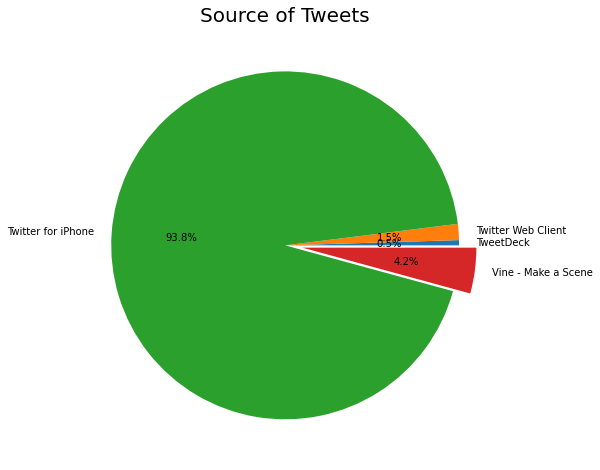

In [532]:
tweet_sources = df.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0,0,0.1))
plt.title("Source of Tweets", {'fontsize': 20})
plt.ylabel("")
plt.savefig('Source_of_tweet.png')

In [533]:
#Most tweets are posted from twitter for iphone. 

##### What is the dog breed with highest number of likes?

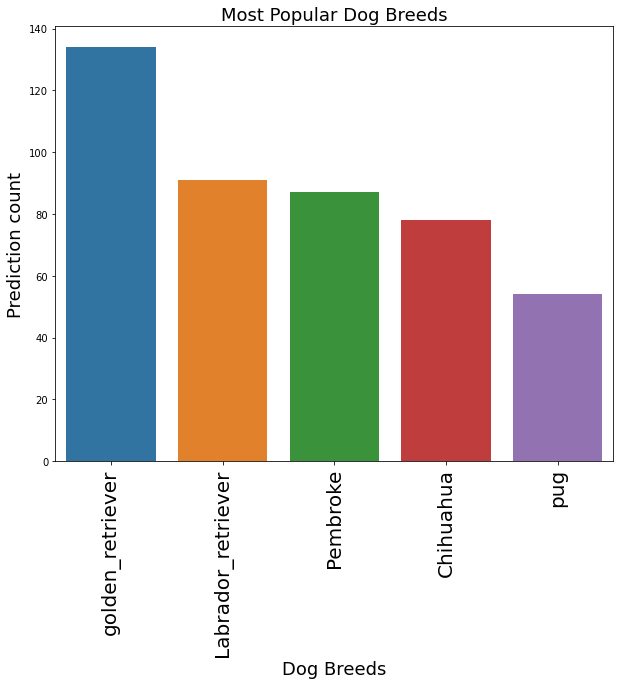

In [534]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = df['p1'].value_counts()[0:5].index,
            y = df['p1'].value_counts()[0:5],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 20);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction count",fontsize = 18);
plt.title("Most Popular Dog Breeds",fontsize = 18);
plt.savefig('Most_popular_Dog_Breeds.png')

In [535]:
#Most popular dog breed is Golden retriver

##### What is the most popular dog names?

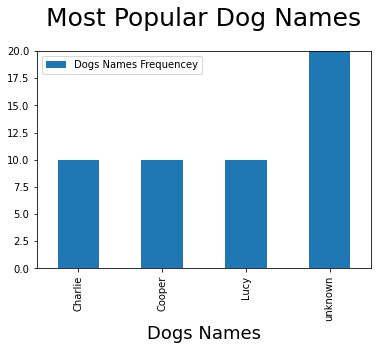

In [536]:
named_dogs = df.query('name == name')
named_dogs_grouped = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 10').sort_values(by=['name_count']).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 20);
plt.ylim(top=20)
plt.title("Most Popular Dog Names",{'fontsize': 25},pad=25)
plt.xlabel("Dogs Names", fontsize = 18)
plt.legend(["Dogs Names Frequencey"])
plt.savefig('Most_popular_Dog_names.png')

In [ ]:
#Most popular dog names are Cooper, Charlie and Lucy. Unknown represent dogs with unknown names.

##### What the most retweeted dog photo?

In [403]:
most_retweeted_dog_photo = df[df['retweet_count'] == df['retweet_count'].max()]
most_retweeted_dog_photo['jpg_url']

1008    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

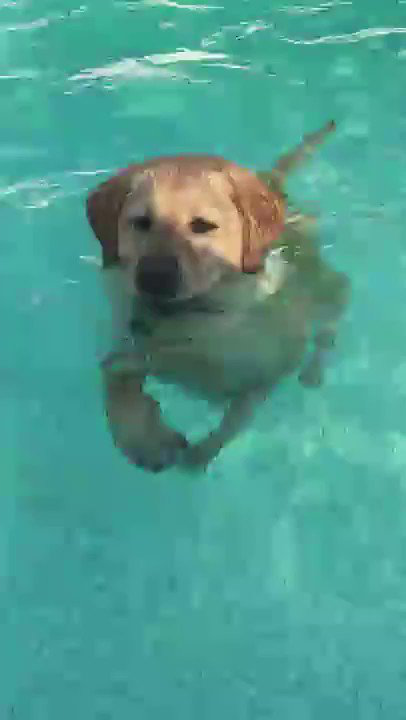

In [404]:
url = df.jpg_url[1008]
r = requests.get(url)
Image.open(BytesIO(r.content))

<a id='ref'></a>
## References

1.https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/

2.https://towardsdatascience.com/twitter-analytics-weratedogs-a441be7d4a85

3.https://www.statology.org/pandas-replace-nan-with-string/